<a href="https://colab.research.google.com/github/vak1997/Global-Terrorism/blob/master/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import squarify    # pip install squarify (algorithm for treemap)


In [ ]:
pip install squarify

In [ ]:
terrorism_df=pd.read_csv("/content/drive/MyDrive/Datasets/Copy of Global Terrorism Data.csv",encoding='ISO-8859-1')

In [ ]:
terrorism_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
terrorism_df.shape

(181691, 135)

In [ ]:
terrorism_df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

### **Data Cleaning**

In [ ]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**drop_columns have null values more than 70%**

In [ ]:
#drop_columns have null values more than 70%
null_df=(terrorism_df.isnull().sum()/len(terrorism_df)*100).reset_index()
terrorism_df.drop(columns=null_df[null_df[0]>=70]["index"],inplace=True)
terrorism_df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,NaN,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Seven military planes were damaged in this att...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Houses were damaged in this attack.,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,NaN,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,START Primary Collection,-9,-9,0,-9


***71 columns have more than 70% null values in our data, so that columns are ignored from analysis***

**Drop duplicate rows**

In [ ]:
terrorism_df.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,NaN,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Seven military planes were damaged in this att...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Houses were damaged in this attack.,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,NaN,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,START Primary Collection,-9,-9,0,-9


**No duplicates found**

**Rename and choose important columns for analysis**

---



In [ ]:
terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed','nwound':'Number_of_Wounded'},inplace=True)

terrorism_df['Casualities'] = terrorism_df.Number_of_Killed + terrorism_df.Number_of_Wounded
terrorism_df

,eventid,Year,Month,Day,Extended,country,Country,region,Region,provstate,...,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,1.0,1.0,NaN,NaN,PGIS,0,1,1,1,0.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...",START Primary Collection,0,0,0,0,3.0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...",START Primary Collection,-9,-9,1,1,9.0
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,START Primary Collection,0,0,0,0,0.0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,START Primary Collection,-9,-9,0,-9,0.0


**Fill some null values with logical values**

In [ ]:
terrorism_df["City"].fillna("Unknown", inplace = True) 
terrorism_df["Number_of_Killed"].fillna(0, inplace = True)

**EXPLORATORY DATA ANALYSIS**

Basic analysis to understand the terrorism data

In [ ]:
terrorism_df.describe()

,eventid,Year,Month,Day,Extended,country,region,latitude,longitude,specificity,...,nwoundte,property,propextent,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,112548.000000,181691.000000,64065.000000,181513.000000,77381.000000,181691.000000,181691.000000,181691.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,0.107163,-0.544556,3.295403,0.059054,-0.145811,-4.543731,-4.464398,0.090010,-3.945952,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,1.488881,3.122889,0.486912,0.461244,1.207861,4.543547,4.637152,0.568457,4.691325,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,1.000000,3.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,200.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9574.000000


**Important inference from terrorism data**

In [ ]:
# No of countires and regions coverted in data set with years
print(f"There are {terrorism_df.Country.nunique()} countries from {terrorism_df.Region.nunique()} regions covered in the dataset terrorist atacks data in {terrorism_df.Year.nunique()} years from {terrorism_df.Year.min()} to {terrorism_df.Year.max()}.")
print(' ')
# No of terrorist attacks and no of peoples killed
print(f"Overally {terrorism_df.index.nunique()} terrorist attacks are recorded here which caused about {int(terrorism_df.Casualities.sum())} casualities consisted of {int(terrorism_df.Number_of_Killed.sum())} kills and {int(terrorism_df.Number_of_Wounded.sum())} wounded.")
print(' ')
# Which Region had the most terrorism attacks?
print('The region of',(colored(terrorism_df['Region'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])) , 'had the highest amount of Terrorist Attacks totalled at',(colored(terrorism_df['Region'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')
# Name of the city, village, or town in which the incident occurred
print((colored(terrorism_df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])) , 'and Unnamed Cities consisting of Terrorist Attacks totalled at',(colored(terrorism_df['City'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')
print('The most known city that had terror attacks was' ,(colored(terrorism_df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'blue', attrs=['bold'])))
print(' ')
#Most notably used weapon
print('The most used weapon in terror attacks was' ,(colored(terrorism_df['Weapon'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalled at',(colored(terrorism_df['Weapon'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')
#most known country
print('The most known country with terrorism attacks was' ,(colored(terrorism_df['Country'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalled at',(colored(terrorism_df['Country'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')
#1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
s = terrorism_df['Suicide'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Out of',(colored(terrorism_df['Suicide'].value_counts(dropna=True, normalize=False, ascending=False).sum(),'red', attrs=['bold'])),'total attacks',s[1],'were suicide attacks')
print(' ')
print('The most preferred method of attack was',(colored(terrorism_df['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalling at',(colored(terrorism_df['Attack_Type'].value_counts(dropna=True, normalize=False, ascending=False).max(),'red', attrs=['bold'])))
print(' ')
t = terrorism_df['Target_Type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('The main targets of terrorists were',(colored(terrorism_df['Target_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'blue', attrs=['bold'])),'totalling at',t[0],', while the second was',(colored(terrorism_df['Target_Type'].value_counts(dropna=True, normalize=False, ascending=False).index[1],'blue', attrs=['bold'])),'at',t[1])

There are 205 countries from 12 regions covered in the dataset terrorist atacks data in 47 years from 1970 to 2017.
 
Overally 181691 terrorist attacks are recorded here which caused about 872892 casualities consisted of 411868 kills and 523869 wounded.
 
The region of Middle East & North Africa had the highest amount of Terrorist Attacks totalled at 50474
 
Unknown and Unnamed Cities consisting of Terrorist Attacks totalled at 10209
 
The most known city that had terror attacks was Baghdad
 
The most used weapon in terror attacks was Explosives totalled at 92426
 
The most known country with terrorism attacks was Iraq totalled at 24636
 
Out of 181691 total attacks 3.7% were suicide attacks
 
The most preferred method of attack was Bombing/Explosion totalling at 88255
 
The main targets of terrorists were Private Citizens & Property totalling at 23.9% , while the second was Military at 15.4%


# **Can we visually see what parts of the world are more targetted?**
**(Top 1000 cities which have more casualities)**

In [ ]:
top_casualities=terrorism_df.sort_values(by=["Casualities"],ascending=False).head(1000)

**Which year have most terrorist attacks?**

In [ ]:
fig = px.scatter_mapbox(top_casualities, lat='latitude', lon='longitude', hover_name="City", hover_data=["Weapon",'provstate','Country','Year','Success'],
                        color_discrete_sequence=["orange"], zoom=1, height=500)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
Year=terrorism_df['Year'].value_counts()
print(f"The most No of the terrorist attacks are in the year {Year[:1]}")

The most No of the terrorist attacks are in the year 2014    16903
Name: Year, dtype: int64


Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

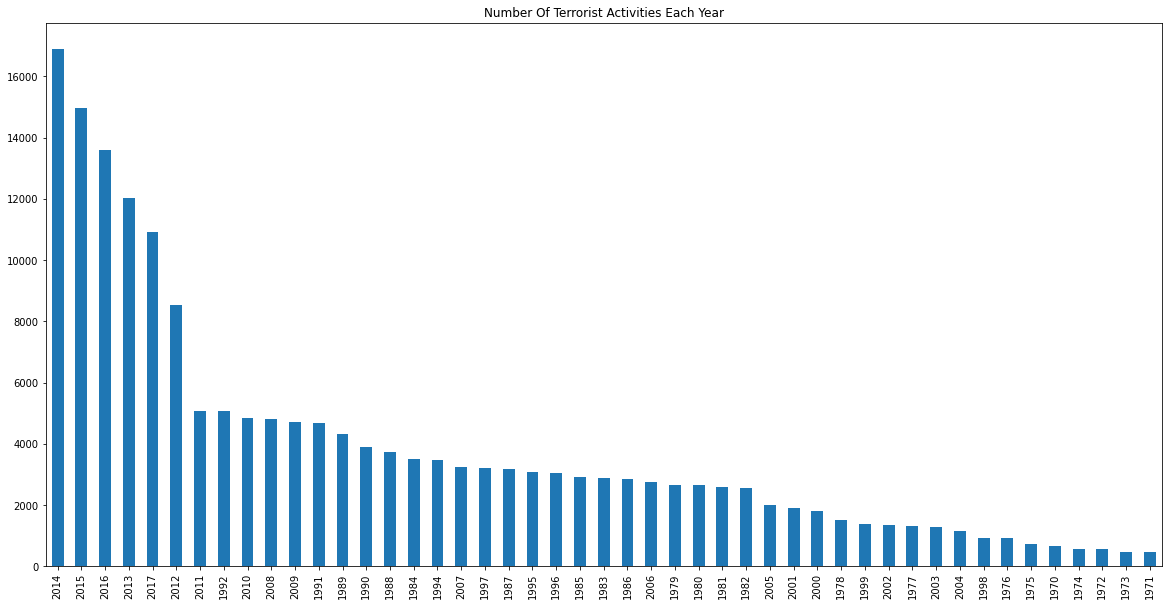

In [ ]:
terrorism_df['Year'].value_counts().plot(kind='bar',figsize=[20,10])
plt.title('Number Of Terrorist Activities Each Year')

From this we confirmed, The year 2014 have more terrorist attacks




**Is terrorist attacks increasing in recent years?**

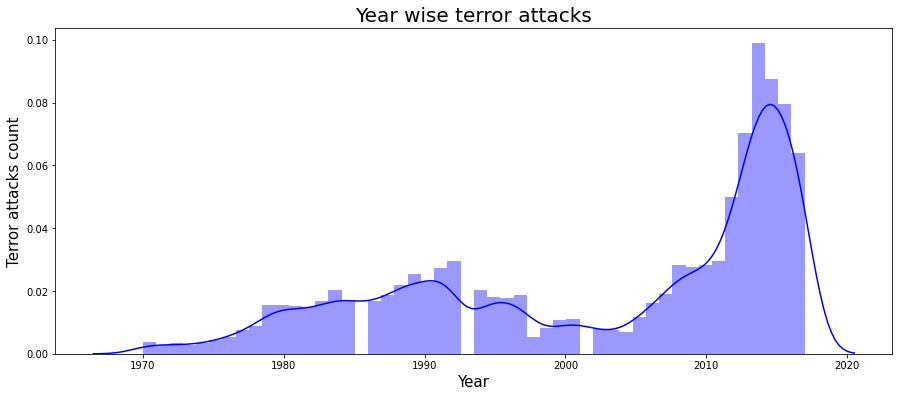

In [ ]:
#no. of terror attacks
plt.figure(figsize=(15,6))
fig = sns.distplot(terrorism_df["Year"].values, color = 'b')
fig.set_xlabel("Year",size=15)
fig.set_ylabel("Terror attacks count",size=15)
plt.title('Year wise terror attacks',size = 20)
plt.show()

The trend clearly shows the terrorist attacks increased drastically from 1998 to 2014, after 2014 it started to decrease again

**Is most Casualites are also at same year as most terrorist attacks?**

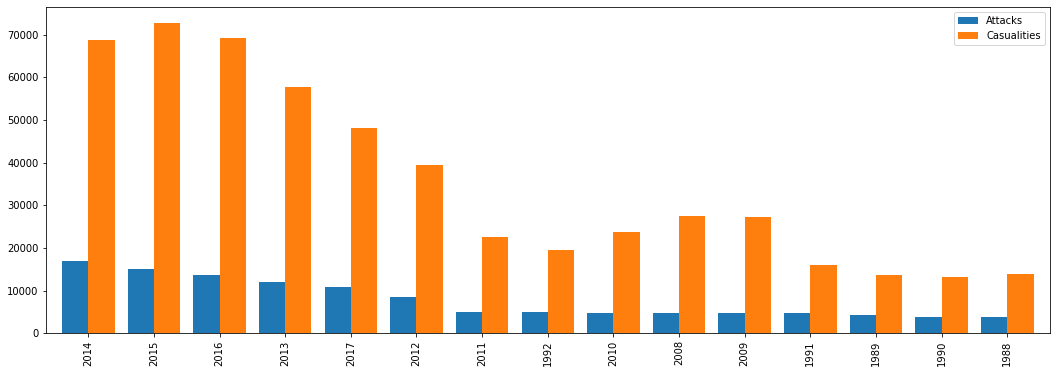

In [ ]:
count=terrorism_df['Year'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=terrorism_df.groupby('Year')['Casualities'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.8)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

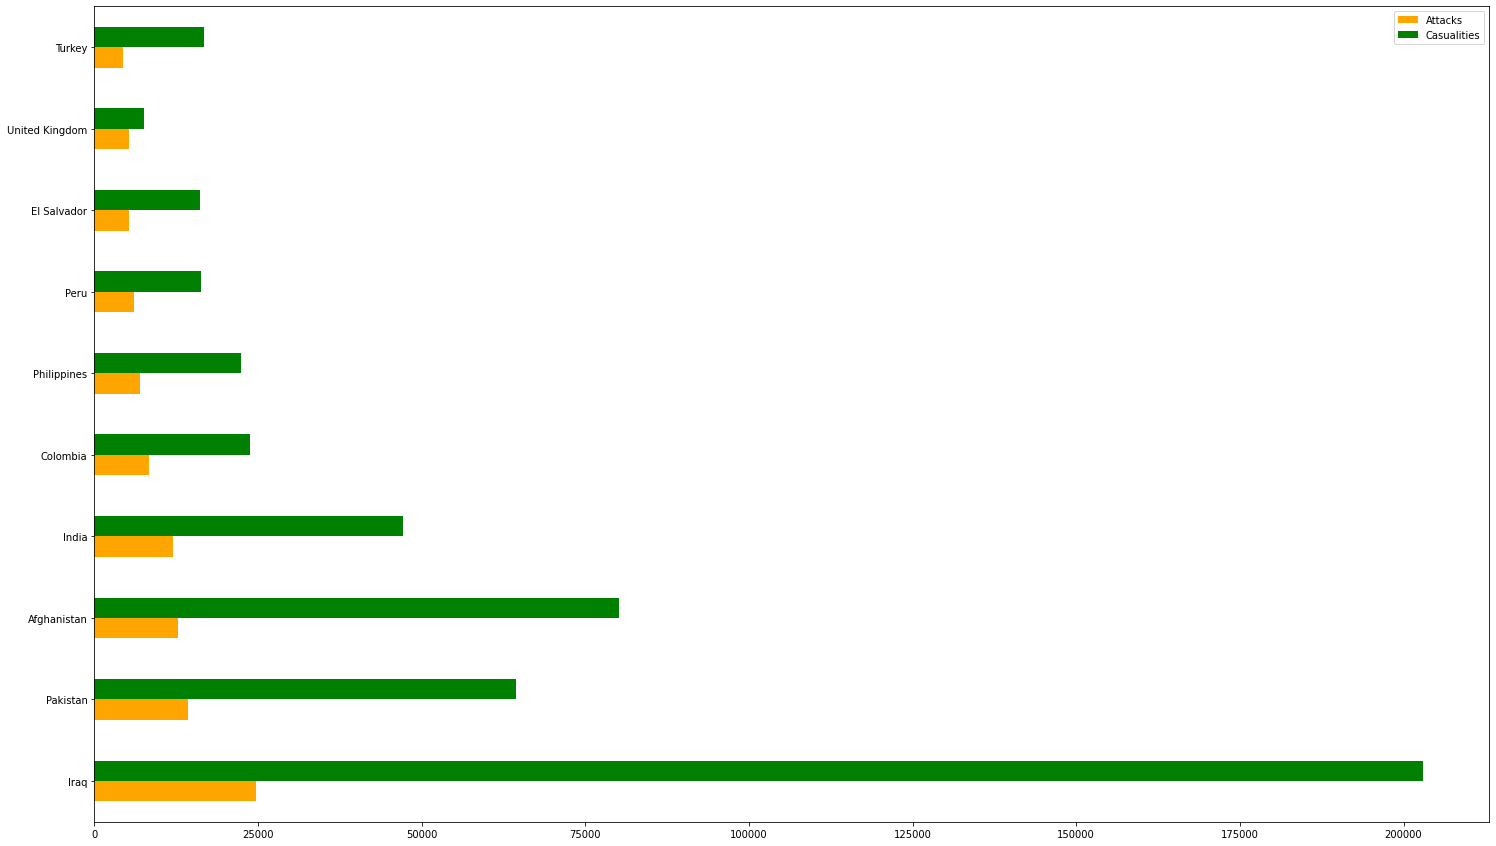

In [ ]:
count=terrorism_df['Country'].value_counts()[:10].to_frame()
count.columns=['Attacks']
data=terrorism_df.groupby('Country')['Casualities'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.barh(color={"Attacks": "orange", "Casualities": "green"})
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

# **Top 10 cities attacked by terrorist**

In [ ]:
terrorism_df['City'].value_counts().head(10)

Unknown         10209
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Name: City, dtype: int64

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Cities')

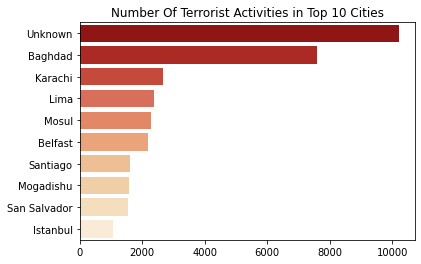

In [ ]:

sns.barplot(terrorism_df['City'].value_counts()[0:10].values,terrorism_df['City'].value_counts()[0:10].index,palette=('OrRd_r'))
plt.title('Number Of Terrorist Activities in Top 10 Cities')

# **Top 10 countries which most attacked by terrorist**

In [ ]:
data=terrorism_df.groupby(['Region']).agg({'Casualities':'sum'}).reset_index()

In [ ]:
data.sort_values('Casualities',ascending=False,inplace=True)

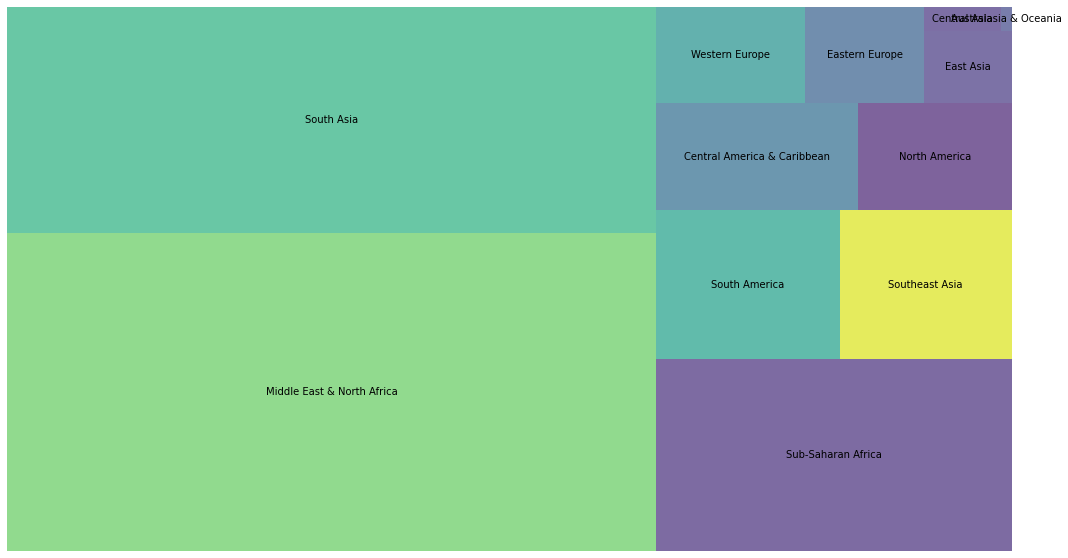

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18, 10)
squarify.plot(sizes=data['Casualities'],label=data['Region'], alpha=.7)
plt.axis('off')
plt.show()

Middle East and North Africa have suffered the highest casualties followed by South Asia and Sub-Saharan Africa.
The Sub-Saharan African region has suffered more fatalities than Western Europe even though the number of attacks have been greater in Western Europe.

# **Most Used Weapons for terrorist attacks**

In [ ]:
weapons = terrorism_df['Weapon'].value_counts().reset_index()
weapons.columns = ['Weapon used', 'Weapon Count']
weapons

,Weapon used,Weapon Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


In [128]:
data=terrorism_df.groupby(['Attack_Group'])['Casualities'].sum().sort_values(ascending=False)[1:11]

In [131]:
data=data.reset_index()

In [134]:
terrorist_groups=data.Attack_Group.to_list()

In [135]:
terrorist_groups

['Islamic State of Iraq and the Levant (ISIL)',
 'Taliban',
 'Al-Qaida',
 'Liberation Tigers of Tamil Eelam (LTTE)',
 'Boko Haram',
 'Tehrik-i-Taliban Pakistan (TTP)',
 'Al-Shabaab',
 'Al-Qaida in Iraq',
 'Shining Path (SL)',
 'Farabundo Marti National Liberation Front (FMLN)']

In [137]:
data=terrorism_df[terrorism_df['Attack_Group']==i]

ValueError: ignored

In [136]:
d=terrorism_df[terrorism_df['Attack_Group'] in terrorist_groups].groupby(['Year','Attack_Group'],sort=True)['Casualities'].sum()
plot_df = d.unstack('Attack_Group').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.xlabel("Year")
plt.ylabel("Casualities")

ValueError: ignored